# PyTorch | Run course notebooks locally

[![colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zanderVenter/test-pytorch/blob/main/notebooks/00_notebook_template.ipynb) [![github](https://img.shields.io/badge/GitHub-View%20on%20GitHub-blue?logo=github)](https://github.com/zanderVenter/test-pytorch/blob/main/notebooks/00_notebook_template.ipynb)

**Author**: Willeke A'Campo

**Description:** 

This notebook demonstrates how you load models stored in classes and use them to make predictions. The notebook uses the course material from  the Udemy course: [Udemy | PyTorch for Deep Learning](https://www.udemy.com/course/pytorch-for-deep-learning-and-computer-vision/) as an example. 

- Combines information from `Perceptron.ipynb`and `Deep_Neural_Networks.ipynb` documented by @rslim087a [here](https://github.com/rslim087a/PyTorch-for-Deep-Learning-and-Computer-Vision-Course-All-Codes-).
- Playground for PyTorch code snippets and examples [here](https://pytorch.org/tutorials/beginner/nn_tutorial.html).
- Playground for Tensorflow Networkss [here](https://playground.tensorflow.org/).


In [1]:
%matplotlib inline
import logging
from pathlib import Path
import numpy as np
import torch
from sklearn import datasets # test datasets

In [2]:
# import local python scripts
project_root= Path.cwd().parents[0]
from src.logger import setup_logging  # noqa
from src.config import load_catalog, load_parameters  # noqa

from src.plot.scatter import scatter_plot, scatter_plot_3d
from src.data.metadata import data_info
from src.models import linearRegression

In [3]:
setup_logging(default_name="notebook")
logger = logging.getLogger(__name__)

[INFO]: Logging configuration file found and loaded.


## Prepare a test dataset

**Choose which test dataset to use:**

| Test | Description | Sample Size | Features | Labels |
| --- | --- | --- | --- | --- |
| 1 | Two clusters of data points | 100 | 2 | 0 or 1 |
| 2 | Inner and outer circle of data points | 500 | 2 | 0 or 1 |
| 3 | Two clusters of data points | 100 | 3 | 0 or 1 |

In [4]:
#test_data = input("Do you want to use test dataset 1, 2 or 3? Enter 1, 2 or 3..")
test_data = 3

[INFO]: The data X:(100, 4, 2) contains 100 samples and 4 features.
[INFO]: The data has size: (100, 4, 2) = 800
[INFO]: The labels y:(100,) contain a label for all 100 samples.
[INFO]: Number of labels: 2.0
[INFO]: Class labels: {0.0, 1.0}


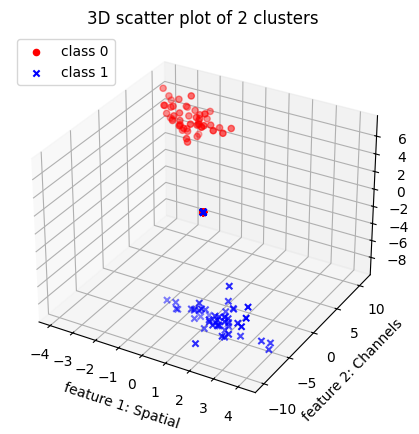

In [5]:
if test_data == 1:
    # TEST DATA 1 
    # define center of the two clusters
    centers = [[-0.5, 0.5], [0.5, -0.5]]

    # create a dataset with 2 clusters
    # X = dataset, y = labels
    X, y = datasets.make_blobs(
        n_samples=100, 
        random_state=999,
        centers=centers, 
        cluster_std=0.4
        )
    data_info(X, y)
    scatter_plot(X, y, 'Plot data clusters', 2)
elif test_data == 2:
    # TEST DATA 2
    X, y = datasets.make_circles(
    n_samples=500, 
    random_state=123, 
    noise=0.1, 
    factor=0.2)
    data_info(X, y)
    scatter_plot(X, y, 'Plot data clusters', 2)
elif test_data == 3:
    # TEST DATA 3 
    # create 3D data with random values
    # data = np.random.rand(100, 4, 2)

    # create 3D data with 2 clusters 
    X, y = datasets.make_blobs(n_samples=100, centers=2, n_features=3, random_state=42)

    # Create an empty 3D tensor
    data = np.zeros((100, 4, 2))

    # Place the first cluster in the first half of the tensor
    data[:50, :3, 0] = X[y==0][:50]

    # Place the second cluster in the second half of the tensor
    data[50:, :3, 0] = X[y==1][:50]
    X = data

    # Create an empty label 1D tensor for the labels
    y_new = np.zeros(100)
    y_new[:50] = 0  # Labels for the first cluster
    y_new[50:] = 1  # Labels for the second cluster
    y = y_new

    data_info(X, y)
    scatter_plot_3d(X, y, '3D scatter plot of 2 clusters', 2)

else:
    print("Invalid input. Please enter 1 or 2.")
    exit()

**Convert data into a PyTorch tensor**

Ensure that X (data) and y (labels) have the same shape. In this case that they are both 2D-arrays (tensors).

**Tensor**: In PyTorch, a tensor is the main data structure. It is a multi-dimensional matrix containing elements of a single data type (float, int, etc.). Tensors are similar to arrays in Numpy. These tensors are used to feed data into the model, store model parameters, and store the model output.

In [6]:
# convert data to tensor
x_data = torch.tensor(X, dtype=torch.float32) 

# reshape y to 2D tensor 
# (100,) -> (100,1)
y_data = torch.tensor(y.reshape(y.shape[0],1), dtype=torch.int64) # ensure that the labels are integers

data_info(x_data, y_data)

[INFO]: The data X:torch.Size([100, 4, 2]) contains 100 samples and 4 features.
[INFO]: The data has size: torch.Size([100, 4, 2]) = <built-in method size of Tensor object at 0x7f30781357b0>
[INFO]: The labels y:torch.Size([100, 1]) contain a label for all 100 samples.
[INFO]: Number of labels: 2
[INFO]: Class labels: {tensor([1]), tensor([1]), tensor([0]), tensor([1]), tensor([1]), tensor([0]), tensor([1]), tensor([0]), tensor([0]), tensor([1]), tensor([1]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([1]), tensor([0]), tensor([1]), tensor([1]), tensor([0]), tensor([0]), tensor([1]), tensor([0]), tensor([0]), tensor([1]), tensor([1]), tensor([0]), tensor([0]), tensor([1]), tensor([1]), tensor([0]), tensor([0]), tensor([1]), tensor([1]), tensor([1]), tensor([1]), tensor([0]), tensor([0]), tensor([1]), tensor([0]), tensor([0]), tensor([1]), tensor([0]), tensor([0]), tensor([1]), tensor([1]), tensor([0]), tensor([0]), tensor([1]), ten

## Load the model

Here we load a linear model located in `src/models/linearRegression.py`


In [8]:
torch.manual_seed(2)
model = linearRegression.Model(2, 1)
logger.info(list(model.parameters()))

[INFO]: [Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]
